In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np   
import seaborn as sns  
df = pd.read_csv('Archivos_higienizados/Higienizado_20240207.csv') 



In [6]:
df['Fecha'] = pd.to_datetime(df['Fecha'])
df['Hora'] = df['Fecha'].dt.hour
df['Dia'] = df['Fecha'].dt.strftime('%A')


df_2 = df[df['Tipo_base']== 'Publico']
df_2['Calificacion'].fillna('NO CALIFICADO', inplace=True)

contacto_efectivo = df_2[df_2['Calificacion'] == 'CONTACTO EFECTIVO']

# Agrupa por hora y día de la semana, y cuenta las llamadas totales y de "contacto efectivo"
aggregated_data = df_2.groupby(['Hora', 'Dia']).agg({'Calificacion': 'count'}).reset_index()
contacto_efectivo_data = contacto_efectivo.groupby(['Hora', 'Dia']).agg({'Calificacion': 'count'}).reset_index()

# Fusiona los dos DataFrames en uno solo
resultados = pd.merge(aggregated_data, contacto_efectivo_data, on=['Hora', 'Dia'], suffixes=('_Total', '_Contacto'))

# Calcula el porcentaje de "contacto efectivo" respecto al total
resultados['Porcentaje Contacto'] = (resultados['Calificacion_Contacto'] / resultados['Calificacion_Total']) * 100

# Muestra los resultados
resultados.head(5)



C:\Users\alexa\AppData\Local\Temp\ipykernel_20196\2515704743.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Calificacion'].fillna('NO CALIFICADO', inplace=True)


,Hora,Dia,Calificacion_Total,Calificacion_Contacto,Porcentaje Contacto
0,8,Friday,527,57,10.815939
1,8,Thursday,411,55,13.381995
2,8,Tuesday,460,21,4.565217
3,9,Friday,577,76,13.171577
4,9,Thursday,747,94,12.583668


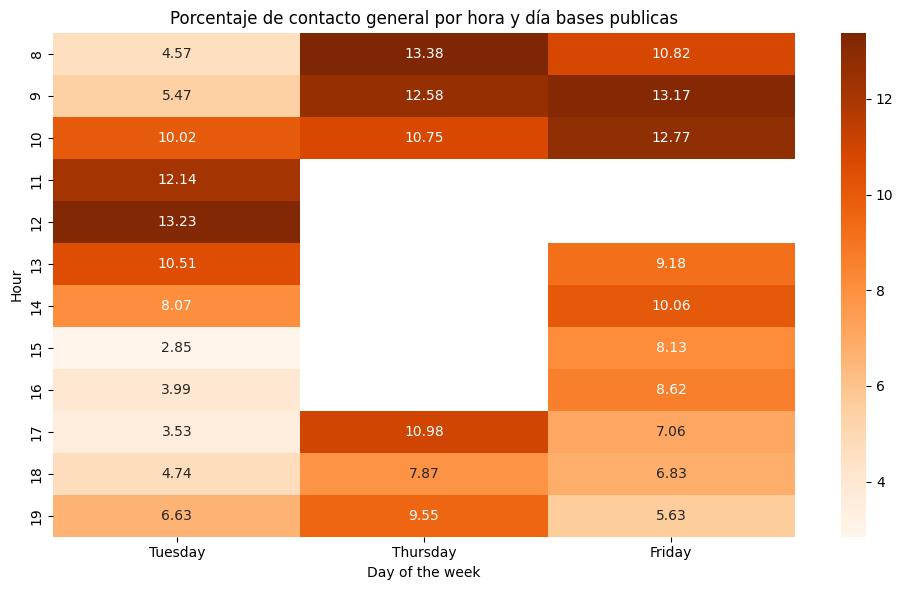

In [7]:
# Configura el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crea una tabla de pivote usando pivot_table
pivot_table = resultados.pivot_table(index='Hora', columns='Dia', values='Porcentaje Contacto')
pivot_table = pivot_table[['Tuesday','Thursday','Friday']]

# Crea el mapa de calor usando Seaborn
sns.heatmap(data=pivot_table, cmap='Oranges', annot=True, fmt=".2f", cbar=True)

# Configura detalles de la gráfica
plt.title('Porcentaje de contacto general por hora y día bases publicas')
plt.xlabel('Day of the week')
plt.ylabel('Hour')

plt.tight_layout()
plt.show()

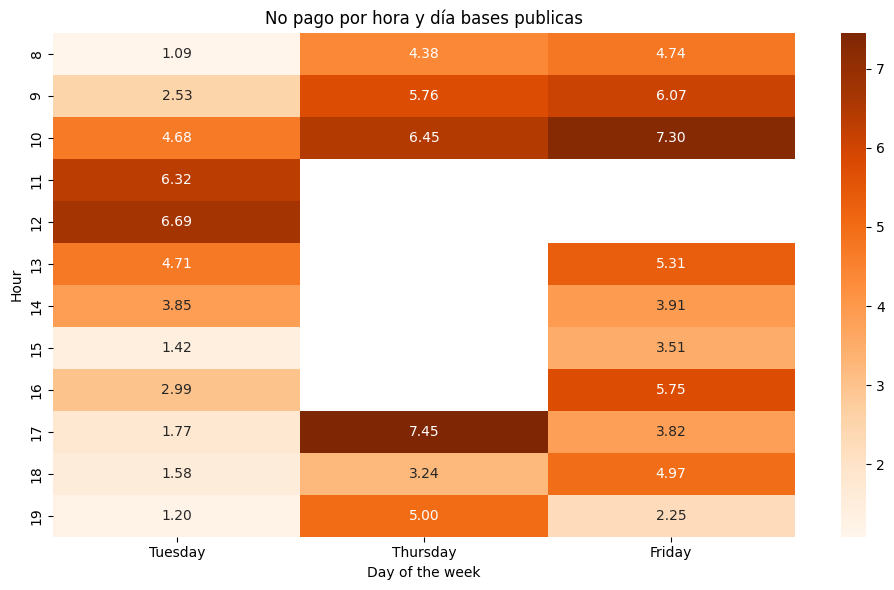

In [8]:
no_pago = df_2[(df_2['Calificacion'] == 'CONTACTO EFECTIVO') & (df_2['Tipificacion']=='NO PAGO')]

# Agrupa por hora y día de la semana, y cuenta las llamadas totales y de "contacto efectivo"
aggregated_data_2 = df_2.groupby(['Hora', 'Dia']).agg({'Calificacion': 'count'}).reset_index()
no_pago_data = no_pago.groupby(['Hora', 'Dia']).agg({'Calificacion': 'count'}).reset_index()

# Fusiona los dos DataFrames en uno solo
resultados_no_pago = pd.merge(aggregated_data_2, no_pago_data, on=['Hora', 'Dia'], suffixes=('_Total', '_Contacto'))

# Calcula el porcentaje de "contacto efectivo" respecto al total
resultados_no_pago['Porcentaje Contacto'] = (resultados_no_pago['Calificacion_Contacto'] / resultados_no_pago['Calificacion_Total']) * 100

# Configura el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crea una tabla de pivote usando pivot_table
pivot_table_2 = resultados_no_pago.pivot_table(index='Hora', columns='Dia', values='Porcentaje Contacto')
pivot_table_2 = pivot_table_2[['Tuesday','Thursday','Friday']]


# Crea el mapa de calor usando Seaborn
sns.heatmap(data=pivot_table_2, cmap='Oranges', annot=True, fmt=".2f", cbar=True)

# Configura detalles de la gráfica
plt.title('No pago por hora y día bases publicas')
plt.xlabel('Day of the week')
plt.ylabel('Hour')

plt.tight_layout()
plt.show()

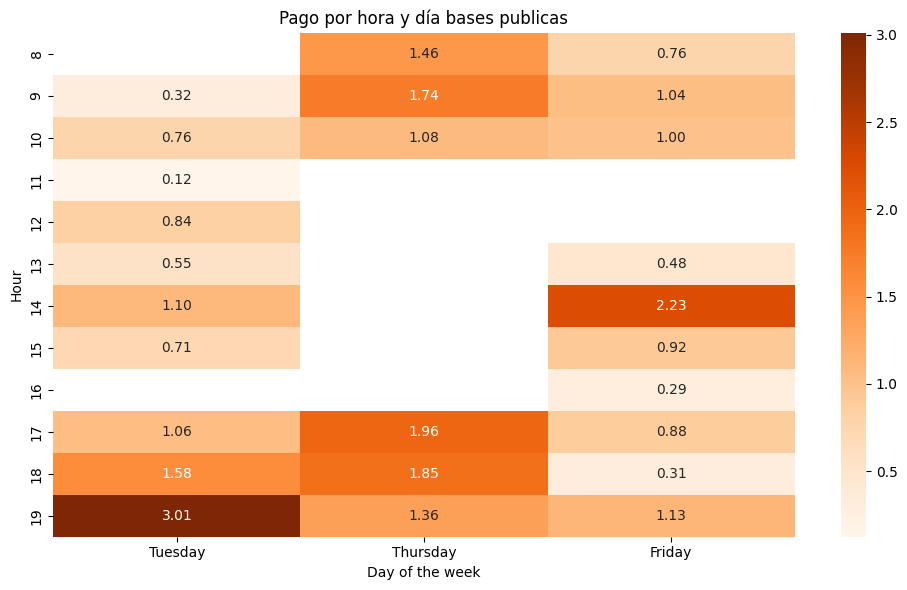

In [9]:
pago = df_2[(df_2['Calificacion'] == 'CONTACTO EFECTIVO') & (df_2['Tipificacion']=='PAGO')]

# Agrupa por hora y día de la semana, y cuenta las llamadas totales y de "contacto efectivo"
aggregated_data_3 = df_2.groupby(['Hora', 'Dia']).agg({'Calificacion': 'count'}).reset_index()
pago_data = pago.groupby(['Hora', 'Dia']).agg({'Calificacion': 'count'}).reset_index()

# Fusiona los dos DataFrames en uno solo
resultados_pago = pd.merge(aggregated_data_3, pago_data, on=['Hora', 'Dia'], suffixes=('_Total', '_Contacto'))

# Calcula el porcentaje de "contacto efectivo" respecto al total
resultados_pago['Porcentaje Contacto'] = (resultados_pago['Calificacion_Contacto'] / resultados_pago['Calificacion_Total']) * 100

# Configura el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crea una tabla de pivote usando pivot_table
pivot_table_3 = resultados_pago.pivot_table(index='Hora', columns='Dia', values='Porcentaje Contacto')
pivot_table_3 = pivot_table_3[['Tuesday','Thursday','Friday']]


# Crea el mapa de calor usando Seaborn
sns.heatmap(data=pivot_table_3, cmap='Oranges', annot=True, fmt=".2f", cbar=True)

# Configura detalles de la gráfica
plt.title('Pago por hora y día bases publicas')
plt.xlabel('Day of the week')
plt.ylabel('Hour')

plt.tight_layout()
plt.show()

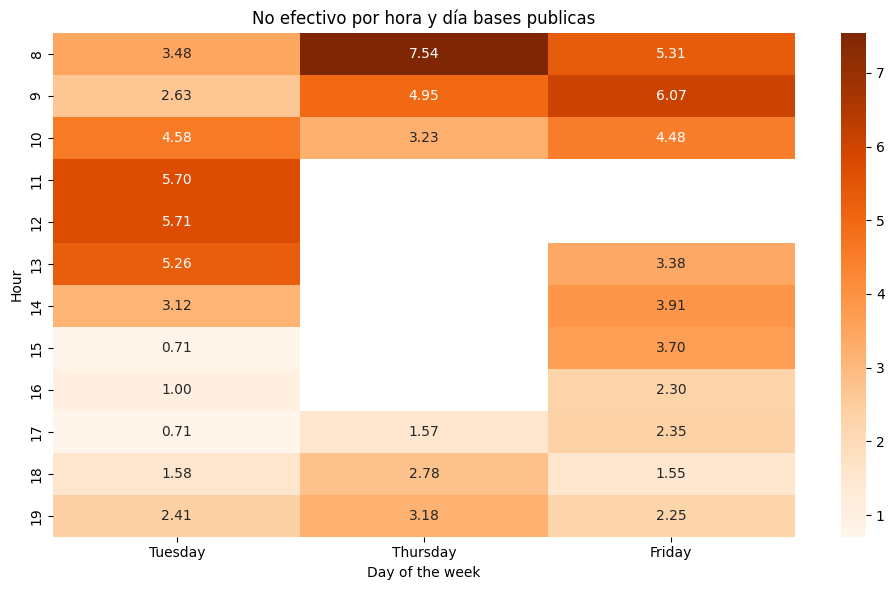

: 

In [10]:
no_efe = df_2[(df_2['Calificacion'] == 'CONTACTO EFECTIVO') & (df_2['Tipificacion']=='NO EFECTIVO')]

# Agrupa por hora y día de la semana, y cuenta las llamadas totales y de "contacto efectivo"
aggregated_data_4 = df_2.groupby(['Hora', 'Dia']).agg({'Calificacion': 'count'}).reset_index()
no_efe_data = no_efe.groupby(['Hora', 'Dia']).agg({'Calificacion': 'count'}).reset_index()

# Fusiona los dos DataFrames en uno solo
resultados_no_efe = pd.merge(aggregated_data_4, no_efe_data, on=['Hora', 'Dia'], suffixes=('_Total', '_Contacto'))

# Calcula el porcentaje de "contacto efectivo" respecto al total
resultados_no_efe['Porcentaje Contacto'] = (resultados_no_efe['Calificacion_Contacto'] / resultados_no_efe['Calificacion_Total']) * 100

# Configura el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crea una tabla de pivote usando pivot_table
pivot_table_4 = resultados_no_efe.pivot_table(index='Hora', columns='Dia', values='Porcentaje Contacto')
pivot_table_4 = pivot_table_4[['Tuesday','Thursday','Friday']]


# Crea el mapa de calor usando Seaborn
sns.heatmap(data=pivot_table_4, cmap='Oranges', annot=True, fmt=".2f", cbar=True)

# Configura detalles de la gráfica
plt.title('No efectivo por hora y día bases publicas')
plt.xlabel('Day of the week')
plt.ylabel('Hour')

plt.tight_layout()
plt.show()